# Importing datasets

In [1]:
import pandas as pd
rating_data = pd.read_csv("ratings.csv")
movie_data = pd.read_csv("movies.csv")

In [2]:
rating_data.head(10)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
5,1,70,3.0,964982400
6,1,101,5.0,964980868
7,1,110,4.0,964982176
8,1,151,5.0,964984041
9,1,157,5.0,964984100


In [3]:
movie_data.head(10)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


# Merging into single dataset and feature selection

In [4]:
rating_data = pd.merge(rating_data , movie_data)

In [5]:
rating_data.head(10)

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
5,18,1,3.5,1455209816,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
6,19,1,4.0,965705637,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
7,21,1,3.5,1407618878,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
8,27,1,3.0,962685262,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
9,31,1,5.0,850466616,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


# visualizing the ratings

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

array([[<AxesSubplot:title={'center':'movieId'}>,
        <AxesSubplot:title={'center':'rating'}>],
       [<AxesSubplot:title={'center':'timestamp'}>,
        <AxesSubplot:title={'center':'userId'}>]], dtype=object)

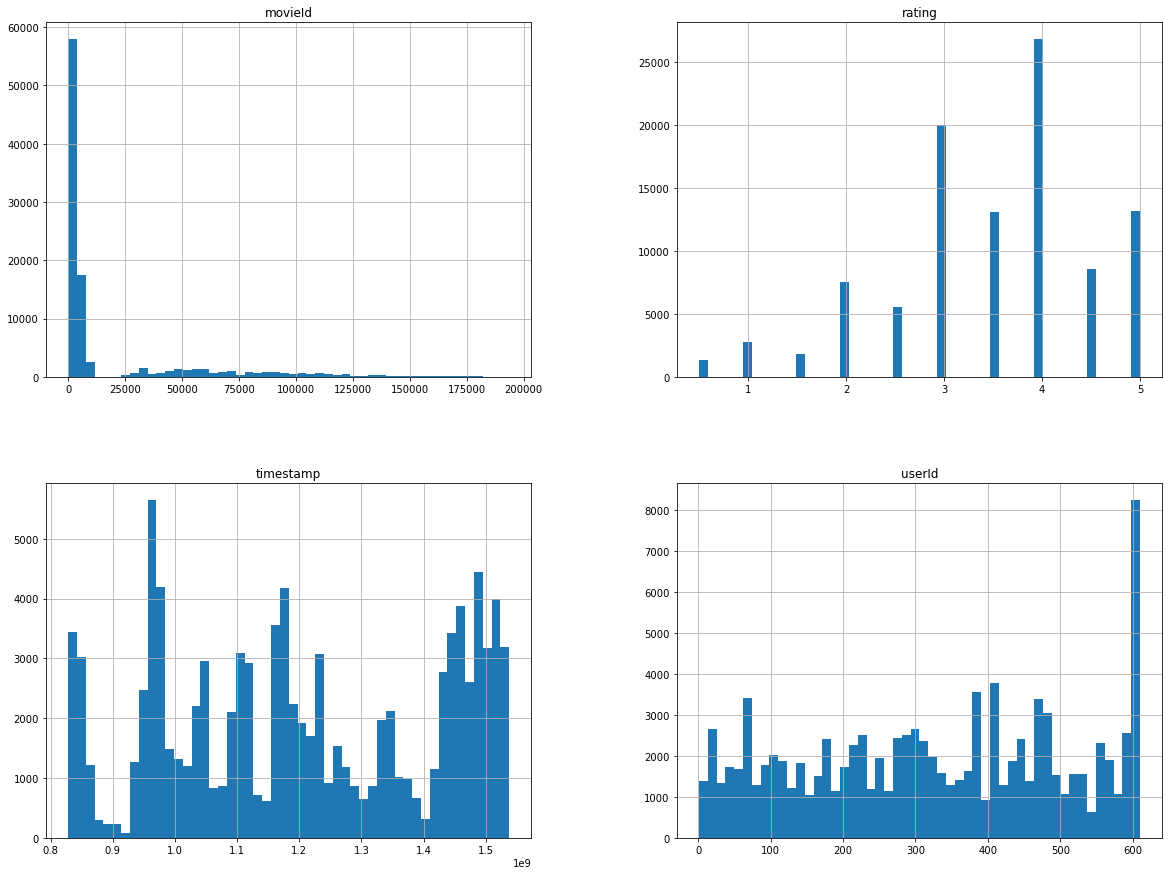

In [7]:
rating_data.hist(bins=50,figsize=(20,15))

# To see which user gave what rating to a perticular movie

In [8]:
user_rating = rating_data.pivot_table(index=['userId'] , columns=['title'] , values='rating')

In [9]:
user_rating

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.5,3.5,NaN,NaN,NaN


# Handeling null values

### removing all movies with less than 10 user ratings

In [10]:
user_rating = user_rating.dropna(thresh=10 , axis=1).fillna(0)

In [11]:
user_rating

title,"'burbs, The (1989)",(500) Days of Summer (2009),10 Cloverfield Lane (2016),10 Things I Hate About You (1999),"10,000 BC (2008)",101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),12 Angry Men (1957),12 Years a Slave (2013),127 Hours (2010),...,Zack and Miri Make a Porno (2008),Zero Dark Thirty (2012),Zero Effect (1998),Zodiac (2007),Zombieland (2009),Zoolander (2001),Zootopia (2016),eXistenZ (1999),xXx (2002),¡Three Amigos! (1986)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
607,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,0.0,4.5,3.5,0.0


In [12]:
similar_item_data = user_rating.corr(method='pearson')

In [13]:
similar_item_data.head(30)

title,"'burbs, The (1989)",(500) Days of Summer (2009),10 Cloverfield Lane (2016),10 Things I Hate About You (1999),"10,000 BC (2008)",101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),12 Angry Men (1957),12 Years a Slave (2013),127 Hours (2010),...,Zack and Miri Make a Porno (2008),Zero Dark Thirty (2012),Zero Effect (1998),Zodiac (2007),Zombieland (2009),Zoolander (2001),Zootopia (2016),eXistenZ (1999),xXx (2002),¡Three Amigos! (1986)
title,,,,,,,,,,,,,,,,,,,,,
"'burbs, The (1989)",1.000000,0.063117,-0.023768,0.143482,0.011998,0.087931,0.224052,0.034223,0.009277,0.008331,...,0.017477,0.032470,0.134701,0.153158,0.101301,0.049897,0.003233,0.187953,0.062174,0.353194
(500) Days of Summer (2009),0.063117,1.000000,0.142471,0.273989,0.193960,0.148903,0.142141,0.159756,0.135486,0.200135,...,0.374515,0.178655,0.068407,0.414585,0.355723,0.252226,0.216007,0.053614,0.241092,0.125905
10 Cloverfield Lane (2016),-0.023768,0.142471,1.000000,-0.005799,0.112396,0.006139,-0.016835,0.031704,-0.024275,0.272943,...,0.242663,0.099059,-0.023477,0.272347,0.241751,0.195054,0.319371,0.177846,0.096638,0.002733
10 Things I Hate About You (1999),0.143482,0.273989,-0.005799,1.000000,0.244670,0.223481,0.211473,0.011784,0.091964,0.043383,...,0.243118,0.104858,0.132460,0.091853,0.158637,0.281934,0.050031,0.121029,0.130813,0.110612
"10,000 BC (2008)",0.011998,0.193960,0.112396,0.244670,1.000000,0.234459,0.119132,0.059187,-0.025882,0.089328,...,0.260261,0.087592,0.094913,0.184521,0.242299,0.240231,0.094773,0.088045,0.203002,0.083518
101 Dalmatians (1996),0.087931,0.148903,0.006139,0.223481,0.234459,1.000000,0.285112,0.119843,0.072399,0.029967,...,0.114968,0.077232,0.096294,0.067134,0.113224,0.184324,0.054024,0.047804,0.156932,0.078734
101 Dalmatians (One Hundred and One Dalmatians) (1961),0.224052,0.142141,-0.016835,0.211473,0.119132,0.285112,1.000000,0.134037,0.017264,-0.046277,...,0.120302,0.125816,0.049818,0.083650,0.171654,0.274260,0.077594,0.085606,0.248820,0.171118
12 Angry Men (1957),0.034223,0.159756,0.031704,0.011784,0.059187,0.119843,0.134037,1.000000,0.132979,0.058862,...,0.104518,0.028415,0.079905,0.241435,0.144652,0.122107,0.056742,-0.001708,0.074306,0.102744
12 Years a Slave (2013),0.009277,0.135486,-0.024275,0.091964,-0.025882,0.072399,0.017264,0.132979,1.000000,0.249931,...,0.024045,0.038127,0.013786,0.190366,0.104150,0.017351,0.063325,0.002528,0.037469,0.004213


In [14]:
def similar_movies(name,rating):
    score = similar_item_data[name]*(rating-2.5)
    score = score.sort_values(ascending=False)
    return score

In [15]:
print(similar_movies("12 Angry Men (1957)",5))

title
12 Angry Men (1957)                              2.500000
It's a Wonderful Life (1946)                     0.804086
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)    0.799289
North by Northwest (1959)                        0.797603
One Flew Over the Cuckoo's Nest (1975)           0.789833
                                                   ...   
River Wild, The (1994)                          -0.167919
Cliffhanger (1993)                              -0.182656
Specialist, The (1994)                          -0.190660
Disclosure (1994)                               -0.192508
Outbreak (1995)                                 -0.212626
Name: 12 Angry Men (1957), Length: 2269, dtype: float64


# When user rated more than 1 movies

### Below data consider that user loves action movies. Our aim is to recmmend all action movies

In [16]:
movies_rated_by_user = [('10 Things I Hate About You (1999)' , 2) , 
                        ('2 Fast 2 Furious (Fast and the Furious 2, The) (2003)',5),
                        ('2012 (2009)' , 4),
                        ('(500) Days of Summer (2009)' ,1)]

In [17]:
recommende_movies = pd.DataFrame()
for movie,rating in movies_rated_by_user:
    recommende_movies = recommende_movies.append(similar_movies(movie , rating))

# Movies with possiblity of recommendations

In [18]:
recommende_movies.sum().sort_values(ascending=False)

2 Fast 2 Furious (Fast and the Furious 2, The) (2003)    2.438471
2012 (2009)                                              1.760023
Crank (2006)                                             1.566166
Fast & Furious (Fast and the Furious 4, The) (2009)      1.443385
Fast and the Furious, The (2001)                         1.395522
                                                           ...   
The Intern (2015)                                       -0.322044
Maleficent (2014)                                       -0.337487
Walk to Remember, A (2002)                              -0.375666
Marley & Me (2008)                                      -0.585845
(500) Days of Summer (2009)                             -0.620822
Length: 2269, dtype: float64

# Top recommended movies

### All the top recommendations are for action movies. Hence our model works fine

In [19]:
recommende_movies.sum().sort_values(ascending=False).head(50)

2 Fast 2 Furious (Fast and the Furious 2, The) (2003)                          2.438471
2012 (2009)                                                                    1.760023
Crank (2006)                                                                   1.566166
Fast & Furious (Fast and the Furious 4, The) (2009)                            1.443385
Fast and the Furious, The (2001)                                               1.395522
Paycheck (2003)                                                                1.371642
Mission: Impossible III (2006)                                                 1.368777
Ultraviolet (2006)                                                             1.357271
A-Team, The (2010)                                                             1.352598
Kung Fu Hustle (Gong fu) (2004)                                                1.320496
King Arthur (2004)                                                             1.314176
Transporter, The (2002)         